# Clean and Analyze Employee Exit Surveys


<img align="left"  src= "http://aaun.edu.au/wp-content/uploads/2016/02/Department_of_Education_and_Training_Australia_logo.jpg" width="300">


<img align="right"  src= "https://www.courseseeker.edu.au/assets/images/institutions/4450.png" width="220">

## Introduction

In this guided project, we'll work with exit surveys from employees of:

- [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) 


- [Technical and Further Education](https://tafeqld.edu.au/) (TAFE) institute in Queensland, Australia. 


<br>

A **data dictionary wasn't provided with the dataset**. For this project, we'll use our general knowledge to define the columns.

We want to know the following:

- `Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?`


- `What about employees who have been there longer?`


- `Are younger employees resigning due to some kind of dissatisfaction?`


- `What about older employees?`


<br>

Through the combination of both surveys we will be able to answer our questions. However, although both used the same survey template, one of them customized some of the answers, therefore we will have to do a good job of cleaning.


<br>

Couple of columns we'll work with from the **dete_survey.csv**:

- `ID`: An id used to identify the participant of the survey


- `SeparationType`: The reason why the person's employment ended


- `Cease Date`: The year or month the person's employment ended


- `DETE Start Date`: The year the person began employment with the DETE

<br>

Couple columns we'll work with from the **tafe_survey.csv**:

- `Record ID`: An id used to identify the participant of the survey


- `Reason for ceasing employment`: The reason why the person's employment ended


- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

### Check and Load data.

Let's import the libraries and explore the dataset:

In [1]:
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#### Checking with `file` the codification format (GNU/Linux tool).
https://www.man7.org/linux/man-pages/man1/file.1.html

In [2]:
! ls 

 csv
 Flow_diagram_Clean_and_Analyze_Employee_Exit_Surveys.mm
'Guided Project Clean and Analyze Employee Exit Surveys.ipynb'
 README.md


In [3]:
! ls csv

dete_survey.csv  tafe_survey.csv


In [4]:
! file -i csv/dete_survey.csv

csv/dete_survey.csv: application/csv; charset=us-ascii


In [5]:
! file -i csv/tafe_survey.csv

csv/tafe_survey.csv: application/csv; charset=us-ascii


#### Checking with chardet: The Universal Character Encoding Detector.
https://pypi.org/project/chardet/

In [6]:
def chardet_check(df):
    with open(df,"rb") as file:
        print(chardet.detect(file.read()))

In [7]:
tafe = "csv/tafe_survey.csv"
dete = "csv/dete_survey.csv"

In [8]:
chardet_check(tafe)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [9]:
chardet_check(dete)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


- Datasets seems correct, so lets proceed to load it.

In [10]:
dete_survey = pd.read_csv("csv/dete_survey.csv") # Dataframes loaded.
tafe_survey = pd.read_csv("csv/tafe_survey.csv")

### Data exploration.

A quick way to see what we have in dataframes is to use the info method as follows.

In [11]:
def explorer(df):
    df.info(verbose=False,
            memory_usage=True,
            show_counts=True)

In [12]:
explorer(dete_survey)  # Department of Education, Training and Employment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Columns: 56 entries, ID to NESB
dtypes: bool(18), int64(1), object(37)
memory usage: 258.6+ KB


In [13]:
explorer(tafe_survey)  # Department of Education, Training and Employment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 72 entries, Record ID to LengthofServiceCurrent. Length of Service at current workplace (in years)
dtypes: float64(2), object(70)
memory usage: 395.0+ KB


#### Quick glance:

- Dataframes have different sizes in the rows 822 vs 702 entries.


- The number of columns of both datasets is very large too 56 vs 72 entries.
 
 
- Columns in `tafe_survey` are extremely large.


In [14]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [15]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

#### More detailed look:

Now we have a better idea of what kind of dataframes we are going to work with:

- We have two asymmetric dataframes in measurements.


- Both dataframes we have null data.


- Column names should be either corrected or deleted if they do not provide sufficient information.


<br>


Due to the large number of columns that each of the datasets has, it is not easy to see the information needed, so having a function that inform about the name of the column having **NaN** values and the amount of them.

In [16]:
def missing_on_columns(df):
    """
    Displays amount of NaN per column.
    
    Keyword argument:
    df -- Dataframe of which we want to check `NaN` number per column.
    """
    print(df.isnull().sum().loc[lambda x : x>0]) # if x is nonzero then in that column there is NaN

- **Missing values** over columns and **NaN** in both dataframes

In [17]:
missing_on_columns(tafe_survey) # Columns with almost 1 missing value or NaN.

CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributing Factors. Career Move - Private Sector                                                                                                               265
Contributing Factors. Career Move - Self-employment                                                                                                              265
Contributing Factors. Ill Health                                                                                                                                 265
Contributi

In [18]:
missing_on_columns(dete_survey) # Columns with almost 1 missing value or NaN.

Position                         5
Classification                 367
Business Unit                  696
Employment Status                5
Professional Development        14
Opportunities for promotion     87
Staff morale                     6
Workplace issue                 34
Physical environment             5
Worklife balance                 7
Stress and pressure support     12
Performance of supervisor        9
Peer support                    10
Initiative                       9
Skills                          11
Coach                           55
Career Aspirations              76
Feedback                        30
Further PD                      54
Communication                    8
My say                          10
Information                      6
Kept informed                    9
Wellness programs               56
Health & Safety                 29
Gender                          24
Age                             11
Aboriginal                     806
Torres Strait       

- Once we get here we will see what is the appearance of a few lines of the data frames

In [19]:
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [20]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### Exploratory summary.


- Each dataframe contains many of the **same columns, but the column named different**.


- **Both** the `dete_survey` and `tafe_survey` dataframes contain **many columns that we don't need to complete our analysis**.


- **There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.**


#### Missing Values.


- `dete_survey` dataframe contains `'Not Stated'` values that indicate **values are missing, but they aren't represented as `NaN`**, to manage it must be indicated in the method `read_csv` assigning to the parameter `na_values = Not stated` then we can see the value as **`NaN`**.


- To start, we'll handle values that should be represented as `NaN`. We'll use `pd.read_csv()` function to fix the missing values first. 

In [21]:
dete_survey_Not_Stated = pd.read_csv('csv/dete_survey.csv',na_values = 'Not Stated')

- Now that we have fixed the problem with the missing data we can visualize the columns with NaN values inside.


- We can drop columns we know we don't need for our analysis.

In [22]:
dete_survey_Not_Stated.head(5) # Not_Stated

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


#### fixed!

### Plot of `NaN` values in `dete_survey`.

Let's see in a more pleasant way in which columns we have NaN data and in which of them we have recovered NaN values after indicating in the load by means of the parameter na_values = 'Not Stated'

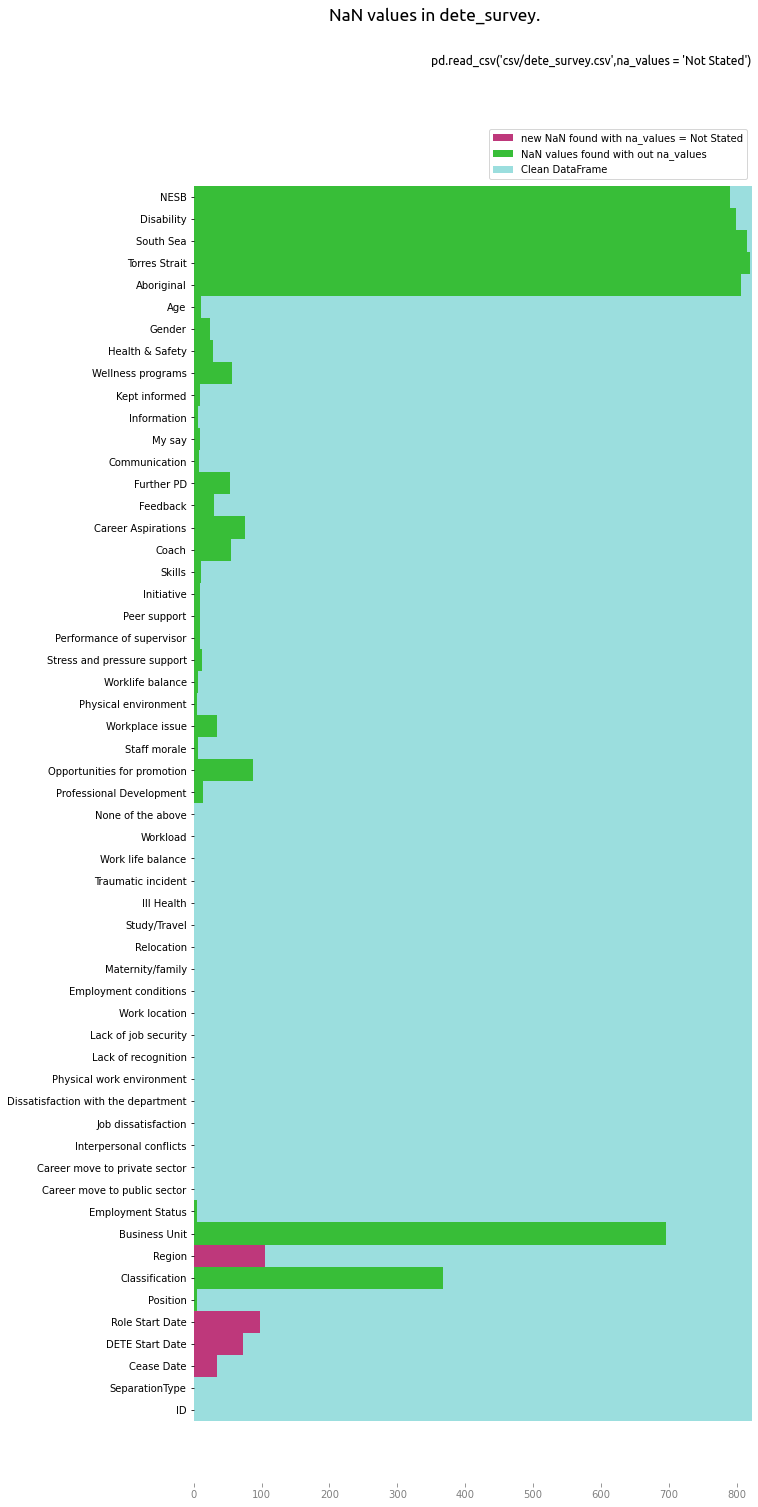

In [23]:
# data from `dete_survey` first variable:
num_cols = dete_survey.isnull().sum().index                         # columns name of dete_survey 
bar_heights_first = dete_survey.isnull().sum()                # value of columns of dete_survey 

# data load from `dete_survey` and the -- na_values = 'Not Stated' --  parameter is set. 
bar_heights = dete_survey_Not_Stated.isnull().sum()                           # value of columns of dete_survey 

# data load from `dete_survey` show all not NaN (background on graphic) 
num_cols_notna = dete_survey_Not_Stated.notna().sum().index                   # columns name of dete_survey
bar_heights_notna = dete_survey_Not_Stated.notna().sum()                      # value of columns of dete_survey


fig, ax = plt.subplots(figsize=(10,25))

ax.text(x=200, y=63, s="NaN values in dete_survey.", family='ubuntu', fontsize='xx-large')
ax.text(x=350, y=61, s="pd.read_csv('csv/dete_survey.csv',na_values = 'Not Stated')", family='ubuntu', fontsize='large')

# layers layout

ax.barh(num_cols, 
        bar_heights,
        height=1,
        color='#be387b', #fucsia color
        alpha=1,
        label='new NaN found with na_values = Not Stated')

ax.barh(num_cols, 
        bar_heights_first,
        height=1,   
        color='#38be38',  #verde
        alpha=1,
        label='NaN values found with out na_values')


ax.barh(num_cols_notna, 
        -bar_heights_notna, left=822,
        height=1,  
        color='#38bebe',  #turquesa color
        alpha=0.5,
        label='Clean DataFrame')




for location in ['left', 'right', 'bottom', 'top']: # remove the axes
    ax.spines[location].set_visible(False)
    
                               # move tick labels top of the graph
ax.tick_params(axis='x', colors='grey')

ax.xaxis.tick_bottom()  

plt.legend()
plt.show()

dete_survey = dete_survey_Not_Stated.copy() # renaming variable

###  Plot columns to drop on `dete_survey` 

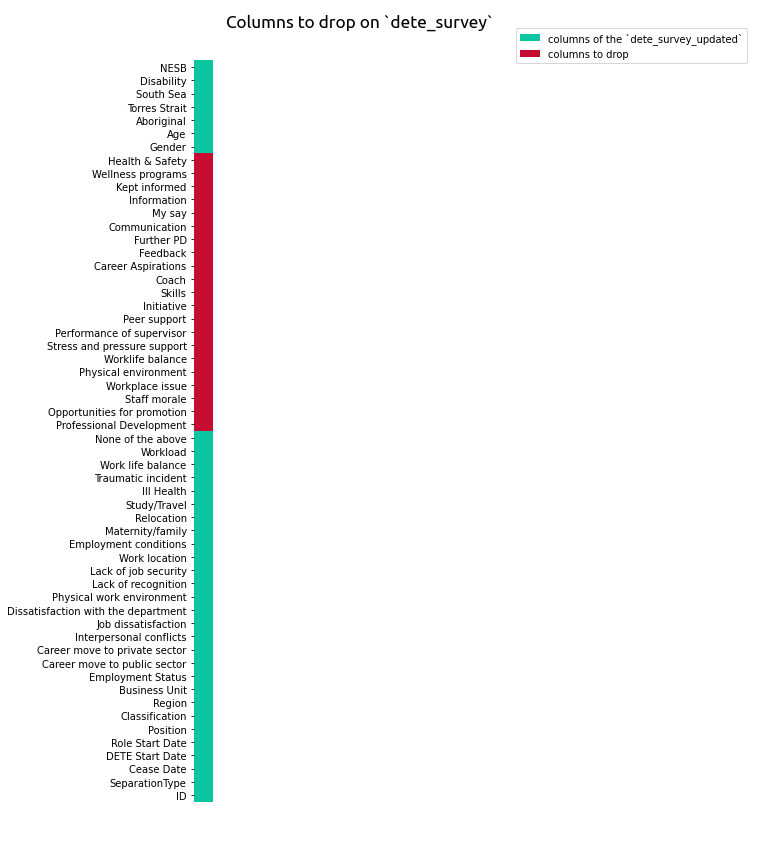

In [24]:
num_cols = dete_survey.isnull().sum().index  # Columns name of dete_survey.
columns_to_drop = dete_survey.columns[28:49] # Columns to drop in dete_survey.

fig, ax = plt.subplots(figsize=(10,15))


ax.text(x=50, y=58, s='Columns to drop on `dete_survey`', family='ubuntu', fontsize='xx-large')
ax.text(x=-150, y=61, s='', family='ubuntu', fontsize='large')

# layer of all columns.
withd=30
ax.barh(num_cols, # selecting all columns
        withd,
        height=1,
        color='#0cc6a2', #green
        alpha=1,
        label='columns of the `dete_survey_updated`')

# layer of columns to remove.
ax.barh(columns_to_drop, # slicing columns to drop
        withd,
        height=1,
        color='#c60c30', #red
        alpha=1,
        label='columns to drop')

# layer white mask.
white_withd = 800
ax.barh(num_cols, white_withd, left=30,
        height=1,
        color='#ffffff', #ffffff white color
        alpha=1)

for location in ['left', 'right', 'bottom', 'top']: # remove the axes
    ax.spines[location].set_visible(False)
    
ax.xaxis.tick_top()                                 # move tick labels top of the graph
ax.tick_params(axis='x', colors='white')

plt.legend()
plt.show()

- So finally we must drop from column `#28` to `#48`.

In [25]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis =1) #dropping dete_survey columns

###  Plot columns to drop on `tafe_survey`

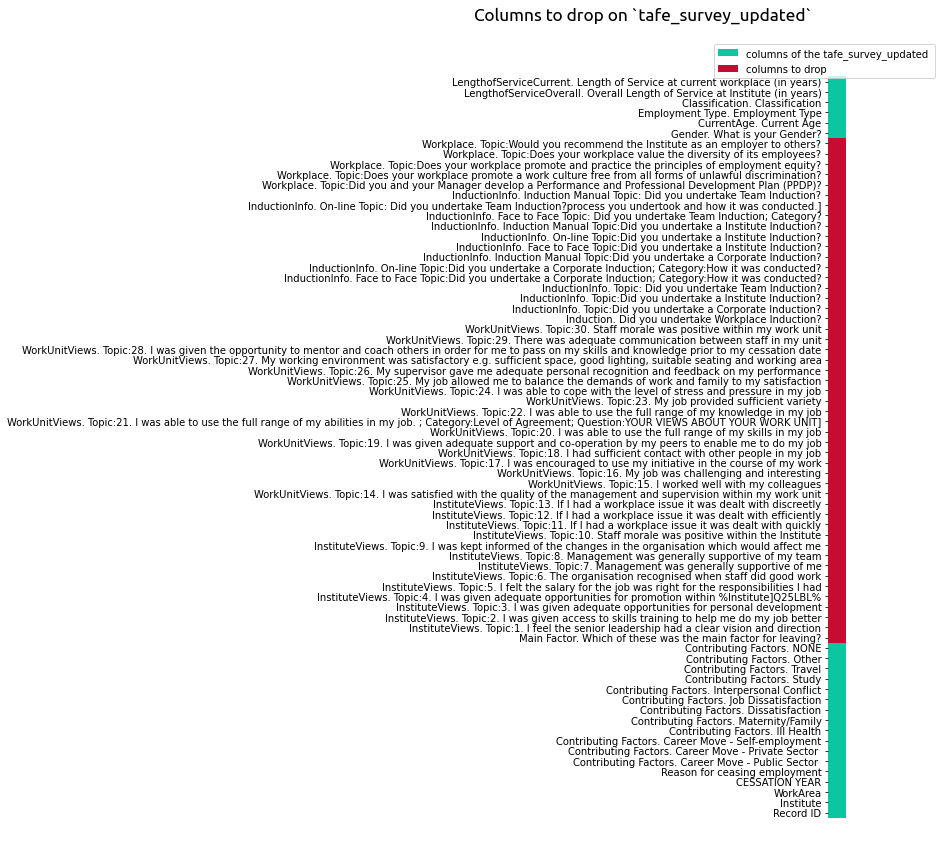

In [26]:
num_cols_tafe = tafe_survey.isnull().sum().index # Columns name of tafe_survey.
bar_heights = tafe_survey.isnull().sum() 

num_cols_del = tafe_survey.columns[17:66] # Columns to drop in tafe_survey.

fig, ax = plt.subplots(figsize=(2,15))

ax.text(x=-2000, y=77, s='Columns to drop on `tafe_survey_updated`', family='ubuntu', fontsize='xx-large')

# layer of all columns.
height_constant = 100

ax.barh( num_cols_tafe,
        height_constant,
        height=1,
        color='#0cc6a2', #green
        alpha=1,
        label='columns of the tafe_survey_updated ')

# layer of columns to remove.
ax.barh( num_cols_del, # slicing columns to drop
        height_constant,
        height=1,
        color='#c60c30', #red
        alpha=1,
        label='columns to drop ')

# layer white mask.
white_withd = 500
ax.barh( num_cols_tafe, white_withd, left=100,
        height=1,
        color='#ffffff', #ffffff
        alpha=1)

for location in ['left', 'right', 'bottom', 'top']: # remove the axes
    ax.spines[location].set_visible(False)
    
ax.xaxis.tick_top()                                 # move tick labels top of the graph
ax.tick_params(axis='x', colors='white')


plt.legend(loc='best')
plt.show()

- In the same way we proceed to drop from column `#17` to `#65`.

In [27]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis =1) #dropping tafe_survey columns


### Cleaning column names in both dataframes.

Beacuse we want to combine both `df's`, we'll have to **standardize the column names**:

- Renaming the remaining columns in the `dete_survey_updated` dataframe, using the following criteria to update the column names:


#### What does it look like `dete_survey_updated`?

In [28]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.rstrip().str.replace(' ','_')
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

### Updating the columns name in `tafe_survey_updated` with `.rename` method.
___

Here **we will use a dictionary** and the method `.rename` to rename the columns:

In [29]:
tafe_survey_updated.rename({'Record ID': 'id',
                            'CESSATION YEAR': 'cease_date',
                            'Reason for ceasing employment': 'separationtype',
                            'Gender. What is your Gender?': 'gender',
                            'CurrentAge. Current Age': 'age',
                            'Employment Type. Employment Type': 'employment_status',
                            'Classification. Classification': 'position',
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},
                          axis=1, inplace=True)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   702 non-null    float64
 1   Institute                                            702 non-null    object 
 2   WorkArea                                             702 non-null    object 
 3   cease_date                                           695 non-null    float64
 4   separationtype                                       701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   437 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  437 non-null    object 
 8   Contributing Factors. Ill Health                     437 non-null    o

___
## Filtering Data


We are going to filter the data in both dataframes to obtain only the resignation of the worker


#### `dete_survey_updated`

In [30]:
dete_survey_updated['separationtype'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [31]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


#### `tafe_survey_updated`

In [32]:
tafe_survey_updated['separationtype'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [33]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

##### By using boolean filtering and logical conditions we must will do a copy of the result, in both dataframes.

<br>

### Filtering the `resignation separation` type In  `dete_survey_updated`

Select **only** the data for survey respondents who have a **Resignation separation** type.

In [34]:
dete_resignations=dete_survey_updated[(dete_survey_updated['separationtype']=='Resignation-Other reasons') |
                                      (dete_survey_updated['separationtype']=='Resignation-Other employer') |
                                      (dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate')].copy()

dete_resignations['separationtype'].value_counts(dropna=False)

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

### Filtering the `resignation separation` type In  `tafe_survey_updated`

In [35]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations['separationtype'].value_counts(dropna=False)

Resignation    340
Name: separationtype, dtype: int64



|dete_resignations|tafe_resignations|
|:---|:---|
|Resignation-Other reasons               150|Resignation    340|
|Resignation-Other employer               91|xxx|
|Resignation-Move overseas/interstate     70|xxx|



## 5. Verifying the Data 

Let's verify any major **inconsistencies**.

Focus on verifying **years** in the `cease_date `and `dete_start_date` columns make sense. 

- **`cease_date` is the last year of the person's employment** 


- **`dete_start_date` is the person's first year of employment** 


#### It wouldn't make sense to have years after the current date.


- Given that most people in this career start working in their 20s, it's also **unlikely that the `dete_start_date` was before the year 1940**.


- If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. 

- If there are a small amount of values that are unrealistically high or low, we can remove them.


#### `dete_resignations` verification dates:

Let's check what type of data we have in 

#### check same in `dete_resignations['dete_start_date']` column.

In [36]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index(ascending = False).head(10)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
Name: dete_start_date, dtype: int64

In [37]:
dete_resignations['dete_start_date'].unique()

array([2005., 1994., 2009., 1997., 1998., 2007.,   nan, 1982., 1980.,
       1973., 1995., 2003., 2006., 2011., 1977., 1974., 1976., 1993.,
       2008., 1986., 2002., 2004., 2010., 2012., 1989., 1999., 1996.,
       2000., 1991., 1992., 2001., 1988., 1990., 1985., 1963., 2013.,
       1972., 1983., 1971., 1984., 1975., 1987.])

In [38]:
dete_resignations['dete_start_date'].isna().sum() # checking amount of NaN

28

#### check same in `dete_resignations['cease_date']` column.

In [39]:
dete_resignations['cease_date'].unique()

array(['05/2012', '07/2012', '2012', '2013', '2010', '07/2013', '06/2013',
       '09/2013', '09/2010', '01/2014', '05/2013', '08/2013', '10/2013',
       '12/2013', '11/2013', nan, '07/2006'], dtype=object)

In [40]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending = False)

2013        74
2012       126
2010         1
12/2013     17
11/2013      9
10/2013      6
09/2013     11
09/2010      1
08/2013      4
07/2013      9
07/2012      1
07/2006      1
06/2013     14
05/2013      2
05/2012      2
01/2014     22
NaN         11
Name: cease_date, dtype: int64

In [41]:
dete_resignations['cease_date'].dtype

dtype('O')

❗ We need stop before continue:

- The data contained in `dete_resignations['cease_date']` is type object and we have a format in which we must extract the years.


- There is also `NaN` values.

<br>

Let's see how many `NaN` we have in `dete_resignations['cease_date']`

In [42]:
dete_resignations['cease_date'].isna().sum()

11

In [43]:
dete_resignations.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


### Comparison graph between `dete_start_date` , `cease_date` columns  (map heat)

Let's make use of the graphs to see what is the number of dates that we are missing in the two columns, for this we are going to make use of a **heat map**, so we have to prepare the dataframe to make use of this tool. making the common data in a new dataframe as an index so that we can visualize the columns to be consulted.

In [44]:
combined_cease_date = dete_resignations.set_index('position')
combined_cease_date.index.unique().sort_values()

Index([                               'Business Service Manager',
                                                       'Cleaner',
                                              'Guidance Officer',
                  'Head of Curriculum/Head of Special Education',
                                                         'Other',
                                          'Professional Officer',
                                                'Public Servant',
                                   'School Administrative Staff',
       'School Based Professional Staff (Therapist, nurse, etc)',
                                               'Schools Officer',
                                                       'Teacher',
                                                  'Teacher Aide',
                                             'Technical Officer',
                                                             nan],
      dtype='object', name='position')

In [45]:
combined_cease_date['dete_start_date'].dtype

dtype('float64')

In [46]:
combined_cease_date['cease_date'].dtype

dtype('O')

- I see that the types of data in the series are different, important when having to make some kind of modification.

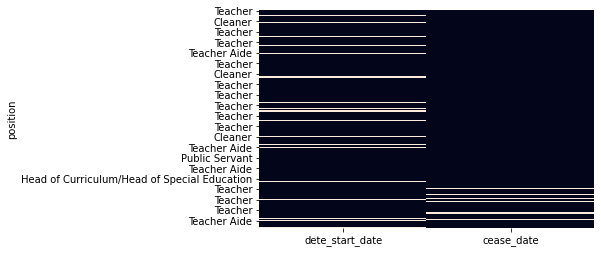

In [47]:
sns.heatmap(combined_cease_date[['dete_start_date','cease_date']].isna(), cbar=False)
plt.show()

In [48]:
test_set_index = dete_resignations
test_set_index.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


**things to do:**

- 1. Extract part of "string" corresponds to **year** in `dete_resignations['cease_date']`.


- 2. Convert the year "string" into a **float** data type.

In [49]:
# using vectorized method
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype('float').copy() # getting Years
dete_resignations['cease_date'].head(3)

3    2012.0
5    2012.0
8    2012.0
Name: cease_date, dtype: float64

In [50]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
NaN        11
Name: cease_date, dtype: int64

#### dete_resignations[`dete_start_date`] & dete_resignations[`cease_date`] verification data:

<br>

Visualizing the data through boxplot we can visualize values that are not correct.

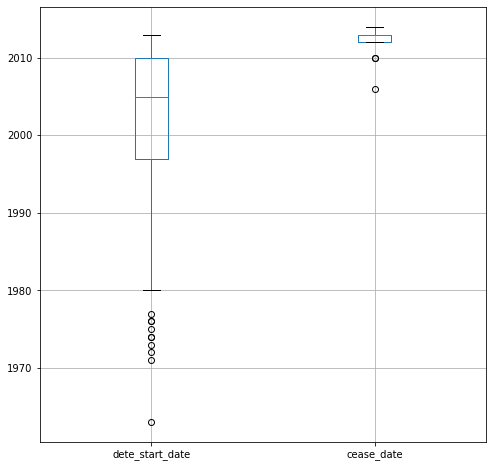

In [51]:
boxplot = dete_resignations.boxplot(column=['dete_start_date','cease_date'], figsize=(8,8)) 

In [52]:
dete_resignations['dete_start_date'].isnull().value_counts() # 28 means NaN values. 

False    283
True      28
Name: dete_start_date, dtype: int64

In [53]:
dete_resignations['cease_date'].isnull().value_counts() # 28 means NaN values. 

False    300
True      11
Name: cease_date, dtype: int64

In [54]:
dete_resignations['dete_start_date'].median()

2005.0

In [55]:
dete_resignations['cease_date'].median()

2013.0

In [56]:
dete_resignations['cease_date'].max()

2014.0

#### Quick summary

||dete_start_date|cease_date|
|:---|:---|:---|
|Values:|283|300|
|NaN:|28|11|


- The dates that begin in the minimum values indicate that there is a number of teachers (small) who enrolled in the mid-70s another group the majority began their career at the end of the 90s and extends until 2010 having an average age that is around 2005 so it follows that the staff is mainly young.


- On the other hand we can see that the volume of cessations is low and that the average of these rounds in 2013.
___

#### `tafe_resignations['position']` verification data:

In [57]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
NaN        11
Name: cease_date, dtype: int64

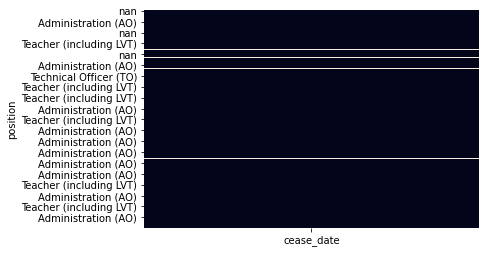

In [58]:
combined_tafe_date = tafe_resignations.set_index('position')
sns.heatmap(combined_tafe_date[['cease_date']].isnull(), cbar=False)
plt.show()

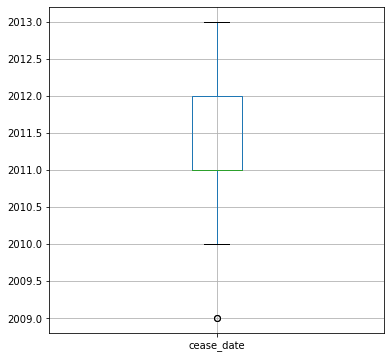

In [59]:
boxplot = tafe_resignations.boxplot(column=['cease_date'], figsize=(6,6))

In [60]:
tafe_resignations['cease_date'].isnull().value_counts()

False    335
True       5
Name: cease_date, dtype: int64

### dete_resignations[`start date`] distribution.

I see that the types of data in the series are different, important when having to make some kind of modification.


/home/ion/anaconda3/envs/dataquest/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ion/anaconda3/envs/dataquest/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


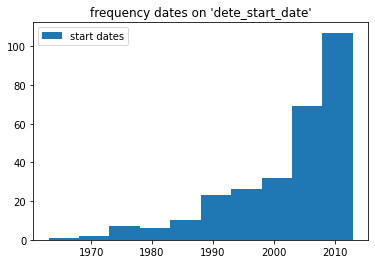

In [61]:
plt.hist(dete_resignations['dete_start_date'],label = "start dates" )
plt.title("frequency dates on 'dete_start_date'")
plt.legend()
plt.show()

The error is due to the fact that in the series I have NaN values.

### `dete_resignations[cease_date]` & `tafe_resignations[cease_date]` distributions.

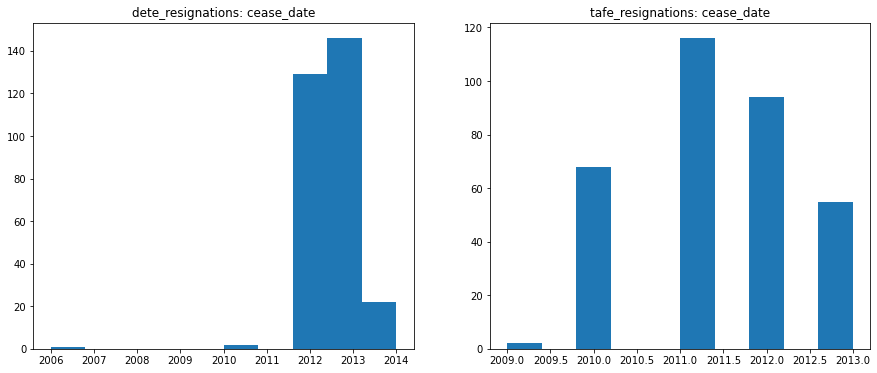

In [62]:
fig = plt.figure(figsize=(15,6))


ax1 = fig.add_subplot(1,2,1) #dete_resignations: cease_date
ax2 = fig.add_subplot(1,2,2) #tafe_resignations: cease_date


ax1.set_title('dete_resignations: cease_date')
ax1.hist(dete_resignations['cease_date'])

ax2.set_title('tafe_resignations: cease_date')
ax2.hist(tafe_resignations['cease_date'])


plt.show()

These are the distributions corresponding to the cessation dates of `dete_resignations` and `tafe_resignations`.

<br>

## 6. Creating a new column `institute_service`

<br>

We'll create a new column with the verifyed years in the `dete_resignations` because `tafe_resignations` **already contains** a **"service"** column, which we renamed to **institute_service**. 


In order to analyze both surveys together, we'll have to create a corresponding **institute_service** column in `dete_resignations`.

In [63]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

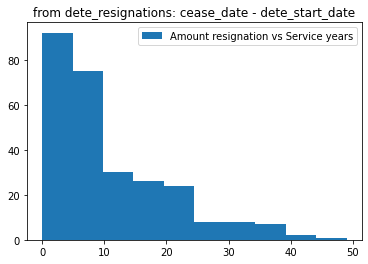

In [64]:
fig, ax = plt.subplots()
ax.set_title('from dete_resignations: cease_date - dete_start_date')
ax.hist(dete_resignations['institute_service'],label="Amount resignation vs Service years")
plt.legend()

plt.show()

- This is the histogram that shows the relationship between voluntary cessation and years of service.

### Identifying employee dissatisfaction across both datasets.

<br>

We'll use to categorize employees as "dissatisfied" from each dataframe, showed in different columns in different ways so the idea is to identify that data and then combine it



<br>

`tafe_survey_updated`:

- Contributing Factors. Dissatisfaction

- Contributing Factors. Job Dissatisfaction

<br>

`dete_survey_updated`:


- job_dissatisfaction

- dissatisfaction_with_the_department

- physical_work_environment

- lack_of_recognition

- lack_of_job_security

- work_location

- employment_conditions

- work_life_balance

- workload

<br>

If the employee indicated **any** of the factors above caused them to resign, we'll mark them as **dissatisfied** in a new column.

In [65]:
tafe_survey_updated['Contributing Factors. Dissatisfaction'].unique()

array([nan, '-', 'Contributing Factors. Dissatisfaction '], dtype=object)

In [66]:
tafe_survey_updated['Contributing Factors. Job Dissatisfaction'].unique()

array([nan, '-', 'Job Dissatisfaction'], dtype=object)

One of the steps to identify the dissatisfaction of the teaching staff is to see what are the factors that contribute to that dissatisfaction and that we can see in the two columns that exist in `tafe_survey_updated`

However when we look within the series and see what the content is, it strikes us that we have values, **nan**, we have what we are looking for and we have a sign **-** that we will make count as False, for this we will create the following function.


#### Function `updating_vals`

In [67]:
def updating_vals(element):
    """
    This function only changes the sign - by False state everything else keeps it the same.
    
    Keyword arguments:
    element -- serie to examine
    return: True if not "-" or NaN
    return: False if equal "-"
    """
    if pd.isnull(element):        
        return np.nan
    elif element=='-':
        return False
    else:
        return True

#### Setting the bolean values on multiple columns with in `tafe_resignations_up` and `dete_resignations` 

Setting bolean values through **any(axis=1, skipna=False)**

by using the function in the columns that tell us what are the factors of dissatisfaction we can redo the series with true or false.

In [68]:
columns = ['Contributing Factors. Dissatisfaction',
           'Contributing Factors. Job Dissatisfaction']

tafe_resignations['dissatisfied'] = tafe_resignations[columns].applymap(updating_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

#### Setting bolean values through `dete_resignations_up` any(axis=1, skipna=False)

In [69]:
columnas = ['job_dissatisfaction',
            'dissatisfaction_with_the_department',
            'physical_work_environment',
            'lack_of_recognition',
            'lack_of_job_security',
            'work_location',
            'employment_conditions',
            'work_life_balance',
            'workload']

dete_resignations[columnas].dtypes

job_dissatisfaction                    bool
dissatisfaction_with_the_department    bool
physical_work_environment              bool
lack_of_recognition                    bool
lack_of_job_security                   bool
work_location                          bool
employment_conditions                  bool
work_life_balance                      bool
workload                               bool
dtype: object

In [70]:
dete_resignations[columnas].head(4)

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False


In [71]:
dete_resignations['dissatisfied'] = dete_resignations[columnas].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

dete_resignations_up['dissatisfied'].value_counts(dropna=False) # only boolean

False    162
True     149
Name: dissatisfied, dtype: int64

### Combining `dete_resignations_up` and `tafe_resignations_up`

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

- Add a column named institute to `dete_resignations_up`. Each row should contain the value **DETE**.


- Add a column named institute to `tafe_resignations_up`. Each row should contain the value **TAFE**.

In [72]:
dete_resignations_up['institute']='DETE' # help for differenciate df's.
tafe_resignations_up['institute']='TAFE'

- Combining the dataframes.

In [73]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], axis = 0) # axis = 0 means columns. 

We still have some columns left in the dataframe that we don't need to complete our analysis, so using the `DataFrame.dropna()` method to drop **any columns with 500 or less** with non null values.


Assign the result to `combined_updated`.

In [74]:
combined.shape

(651, 53)

In [75]:
combined_updated = combined.dropna(axis = 1, thresh = 500).copy() # combined_updated

In [76]:
combined_updated.shape

(651, 10)

Until now we had not done anything with the NaN values neither in one df nor in the other because it was at this point where with the use of dropna (axis, thresh) we were going to take care of the NaN values


As a result we see that the reduction of columns is significant, going from 53 to 10 and gives us an idea of the number of NaN values we had.


Joining two dataframes has a consequence...


## 📸 reseting-index-in-a-pandas-dataframe 📸

In order not to have the repeated indices as a result of concatenation.

I had to do this:
[How to reset index in a pandas dataframe? [duplicate]](https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe)

In [77]:
combined_updated.reset_index(drop=True, inplace=True) 

___
### Cleaning `service_column` 


With the combined dataframes we can now perform some type of analysis.

First, though, we'll have to clean up the `institute_service` column. 

This column is tricky to clean because it currently contains values in a couple different forms:

In [78]:
combined_updated['institute_service'].dtypes

dtype('O')

We see that the series is of type `dtype('O')` 

However pandas seem to lack that distinction and coerce `str` to `object`[explanation](https://stackoverflow.com/questions/34881079/pandas-distinction-between-str-and-object-types) because of this in the next cell we force it to be of the `str` type, but do this the regular expressions would not work correctly since they have to have strings of type `str`

In [79]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str) # <-astype(str) imprescindible
combined_updated['institute_service'].unique()

array(['7.0', '18.0', '3.0', '15.0', '14.0', '5.0', 'nan', '30.0', '32.0',
       '39.0', '17.0', '9.0', '6.0', '1.0', '35.0', '38.0', '36.0',
       '19.0', '4.0', '26.0', '10.0', '8.0', '2.0', '0.0', '23.0', '13.0',
       '16.0', '12.0', '21.0', '20.0', '24.0', '33.0', '22.0', '28.0',
       '49.0', '11.0', '41.0', '27.0', '42.0', '25.0', '29.0', '34.0',
       '31.0', '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

#### Cleaning column before to use.

<br>

- we must convert these numbers into categories. 


- Through the use of vectorized methods and **regex** expressions.

In [80]:

    ## ReGex pattern for filtering ##

    # pat = r"(?P<punto0>[.][0])|
    # (?P<uno_a_dos>[1][-][2])|
    # (?P<tres_a_cuatro>[3][-][4])|
    # (?P<siete_diez>[7][-][1][0])|
    # (?P<once_veinte>[1]{2}-[2][0])|
    # (?P<cinco_seis>[5][-][6])|
    # (?P<Less>Less than 1 year)|
    # (?P<More>More than 20 years)"

    # es necesario que sea str sino, no puede hacer uso de accesores correctamente.
    
c_name = "institute_service"

x = np.nan

combined_updated[c_name] = combined_updated[c_name].str.replace("[.^0][1-2^0]","",regex=True).copy()
combined_updated[c_name] = combined_updated[c_name].str.replace("Less than 1 year","0.5").copy()
combined_updated[c_name] = combined_updated[c_name].str.replace("More than 20 years","25").copy()
combined_updated[c_name] = combined_updated[c_name].str.replace("1-2","1.5").copy()
combined_updated[c_name] = combined_updated[c_name].str.replace("3-4","3.5").copy()
combined_updated[c_name] = combined_updated[c_name].str.replace("5-6","5.6").copy()
combined_updated[c_name] = combined_updated[c_name].str.replace("7-10","8.5").copy()
combined_updated[c_name] = pd.to_numeric(combined_updated[c_name], errors='coerce') 

#### once cleaned, we convert the series from `str` to `float` type.

In [81]:
combined_updated[c_name].value_counts(dropna=False).head(5)

NaN    88
0.5    73
1.5    64
3.5    63
5.6    33
Name: institute_service, dtype: int64

In [82]:
combined_updated[c_name].astype(float).head(10)

0     7.0
1    18.0
2     3.0
3    15.0
4     3.0
5    14.0
6     5.0
7     NaN
8    30.0
9    32.0
Name: institute_service, dtype: float64

In [83]:
def mapper(serie):
    """Change a value in years for a experience category: New - Experienced - Established - Veteran
    
    Keyword arguments:
    serie -- series of the dataframe you want to convert
    return -- depending on the values returns the categories.
    """
    if pd.isnull(serie):
        return np.nan
    elif (serie < 3): # Less than 3 years at a company
        return 'New'
    
    elif ((serie >= 3) & (serie <= 6.0)): # 3-6 years at a company
        return 'Experienced'
    
    elif ((serie >= 7.0) & (serie <= 10.0)): # 7-10 years at a company
        return 'Established'
    
    elif (serie >= 11.0): #  11 or more years at a company
        return 'Veteran'

In [84]:
combined_updated['service_cat']=combined_updated['institute_service'].apply(mapper)

In [85]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [86]:
combined_updated.head(5) # The final dataframe!

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced


___
## Initial Analysis 📊

In [88]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    float64
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
 10  service_cat        563 non-null    object 
dtypes: bool(1), float64(3), object(7)
memory usage: 51.6+ KB


In [93]:
combined_updated.isna().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          0
institute             0
service_cat          88
dtype: int64

- The criterion I use to populate the nan values is the one with the largest number of either true or false

In [118]:
combined_updated['dissatisfied'].fillna(value=False, inplace=True)

In [119]:
combined_updated['dissatisfied'].isnull().sum() # 0 NaN.

0

- the dataset has 11 columns and a maximum number of rows of 651

- there are only 4 columns where we do not lack any data.

- institute_service is the one with the highest number of NaN

- dtypes: bool(1), float64(3), object(7)


### The initial questions were as follows:

- `Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?`


- `What about employees who have been there longer?`


- `Are younger employees resigning due to some kind of dissatisfaction?`


- `What about older employees?`


In [129]:
def percentage(val):
    return np.mean(val * 100)

In [133]:
combined_updated.pivot_table(values = 'dissatisfied', index = 'service_cat', aggfunc=percentage)

,dissatisfied
service_cat,
Established,51.612903
Experienced,34.302326
New,29.533679
Veteran,48.529412


- we can see that the category of veterans and people who are already established in the institutes are the ones who are most dissatisfied.

In [158]:
x = combined_updated.pivot_table(values = 'dissatisfied', index = 'service_cat', aggfunc=percentage)

<function matplotlib.pyplot.show(*args, **kw)>

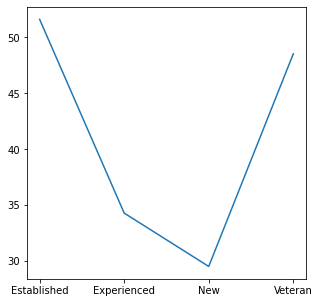

In [139]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))
plt.plot(combined_updated.pivot_table(values = 'dissatisfied', index = 'service_cat', aggfunc=percentage))
plt.show

In [146]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [180]:
x

,dissatisfied
service_cat,
Established,51.612903
Experienced,34.302326
New,29.533679
Veteran,48.529412


#### - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?

In [95]:
dissatisfied_grouped = combined_updated.groupby('dissatisfied')
employees_dissatisfied = dissatisfied_grouped.get_group(1) # 1 True / 0 False
short_period = employees_dissatisfied.groupby('service_cat')
new_dissatidfied =  short_period.get_group('New')
print(len(new_dissatidfied))
new_dissatidfied[1:5]

57


,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
43,119.0,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Female,46-50,2.0,True,DETE,New
44,125.0,Resignation-Other employer,2012.0,Public Servant,Permanent Part-time,Female,36-40,0.0,True,DETE,New
46,131.0,Resignation-Other employer,2012.0,Public Servant,Temporary Full-time,Male,51-55,0.0,True,DETE,New
56,180.0,Resignation-Other reasons,2012.0,Cleaner,Permanent Full-time,Female,36-40,0.0,True,DETE,New


In [96]:
new_dissatidfied['separationtype'].value_counts(normalize=True)*100

Resignation                             63.157895
Resignation-Other reasons               15.789474
Resignation-Move overseas/interstate    12.280702
Resignation-Other employer               8.771930
Name: separationtype, dtype: float64

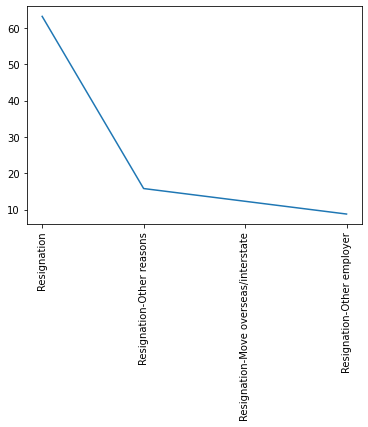

In [107]:
plt.plot(new_dissatidfied['separationtype'].value_counts(normalize=True)*100)
plt.xticks(rotation = 90)
plt.show()

#### - What about employees who have been there longer?

In [98]:
long_period = employees_dissatisfied.groupby('service_cat')
veteran_dissatidfied =  long_period.get_group('Veteran')
print(len(veteran_dissatidfied))
veteran_dissatidfied[1:5]

66


,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
10,23.0,Resignation-Other reasons,2012.0,School Administrative Staff,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
11,24.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,61 or older,39.0,True,DETE,Veteran
12,26.0,Resignation-Other reasons,2012.0,Teacher,Permanent Part-time,Female,41-45,17.0,True,DETE,Veteran


In [99]:
veteran_dissatidfied['separationtype'].value_counts(normalize=True)*100

Resignation-Other reasons               60.606061
Resignation-Other employer              19.696970
Resignation                             15.151515
Resignation-Move overseas/interstate     4.545455
Name: separationtype, dtype: float64

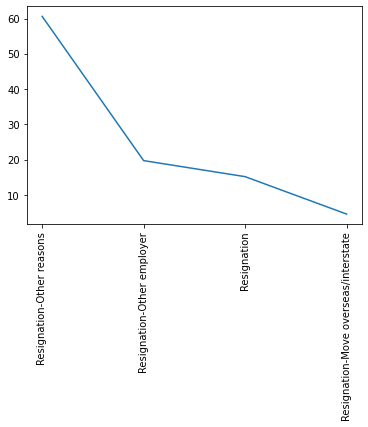

In [105]:
plt.plot(veteran_dissatidfied['separationtype'].value_counts(normalize=True)*100)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
%%html
<style>
table {float:left}
</style>

 ### 
|Are employees who only worked for the institutes resigning due to some kind of dissatisfaction?|||
|:---|---:|:--|
|                                   |Newby|Veteran||
|Resignation|                         36|10||
|Resignation-Other reasons|           9 |40|
|Resignation-Move overseas/interstate| 7 |3|
|Resignation-Other employer|           5 |13|


 ## - How many people in each career stage resigned due to some kind of dissatisfaction?

___
### `Veteran`

In [ ]:
veteran_dissatidfied = employees_dissatisfied.groupby('service_cat')
veteran_position =  veteran_dissatidfied.get_group('Veteran') 

In [ ]:
veteran_position['position'].value_counts(normalize=True)*100

In [ ]:
veteran_position['separationtype'].value_counts(normalize=True)*100

___
### `Established`

In [ ]:
established_dissatidfied = employees_dissatisfied.groupby('service_cat')
established_position =  established_dissatidfied.get_group('Established') 

In [ ]:
established_position['position'].value_counts(normalize=True)*100

In [ ]:
established_position['separationtype'].value_counts(normalize=True)*100

___
### `Experienced`

In [ ]:
experienced_dissatidfied = employees_dissatisfied.groupby('service_cat')
experienced_position =  experienced_dissatidfied.get_group('Experienced') 

In [ ]:
experienced_position['position'].value_counts(normalize=True)*100

In [ ]:
experienced_position['separationtype'].value_counts(normalize=True)*100

___
### `New`

In [ ]:
new_dissatidfied = employees_dissatisfied.groupby('service_cat')
new_position =  new_dissatidfied.get_group('New') 

In [ ]:
new_position['position'].value_counts(normalize=True)*100

In [ ]:
new_position['separationtype'].value_counts(normalize=True)*100

___
### Clean the `age` column. 

I considered it appropriate to do two functions. 

One of them is be able to group `age_groups` by age and another `age_cleaner` to be able to work with the values of the ages.

In [ ]:
combined_updated['age'].unique()

In [ ]:
def age_groups(val):
    if pd.isnull(val):
        return np.nan
    elif val == '36-40':
        return '36-40'
    elif val == '41-45':
        return '41-45'
    elif val == '31-35':
        return '31-35'
    elif val == '46-50':
        return '46-50'
    elif val == '61 or older':
        return '61 or older'
    elif val == '56-60':
        return '56-60'
    elif val == '51-55':
        return '51-55'
    elif val == '21-25':
        return '21-25'
    elif val == '26-30':
        return '26-30'
    elif val == '20 or younger':
        return '20 or younger'
    elif val == '41  45':
        return '41-45'
    elif val == '56 or older':
        return '56-60'
    elif val == '46  50':
        return '46-50'
    elif val == '36 40':
        return '36-40'
    elif val == '21  25':
        return '21-25'
    elif val == '31  35':
        return '31-35'
    elif val == '26  30':
        return '26-30'

In [ ]:
combined_updated['age']=combined_updated['age'].map(age_groups).copy()

In [ ]:
combined_updated['age']

In [ ]:
def age_cleaner(val):
    if pd.isnull(val):
        return np.nan
    elif val == '36-40':
        return '38'
    elif val == '41-45':
        return '43'
    elif val == '31-35':
        return '33'
    elif val == '46-50':
        return '48'
    elif val == '61 or older':
        return '61'
    elif val == '56-60':
        return '58'
    elif val == '51-55':
        return '53'
    elif val == '21-25':
        return '23'
    elif val == '26-30':
        return '28'
    elif val == '20 or younger':
        return '19'
    elif val == '41  45':
        return '43'
    elif val == '56 or older':
        return '57'
    elif val == '46  50':
        return '48'
    elif val == '36 40':
        return '38'
    elif val == '21  25':
        return '23'
    elif val == '31  35':
        return '33'
    elif val == '26  30':
        return '28'

In [ ]:
combined_updated['age']

In [ ]:
combined_updated['new_age'] = combined_updated['age'].map(age_cleaner).astype('float').copy()
combined_updated[1:4]

## How many people in each age group resigned due to some kind of dissatisfaction?

In [ ]:
dissatisfied_grouped = combined_updated.groupby('dissatisfied')
employees_dissatisfied = dissatisfied_grouped.get_group(1) # 1 True / 0 False

In [ ]:
combined_updated['age'].unique() # these are the age groups.


Below I show the pairwise plot relationships of **all age groups** and added the `genre`, I found it interesting to plot this information.


### `'61 or older'`

In [ ]:
age_dissatidfied = employees_dissatisfied.groupby('age')
older_position =  age_dissatidfied.get_group('61 or older') 

In [ ]:
older_position['separationtype'].value_counts(normalize=True)*100

In [ ]:
older_position['institute'].value_counts(normalize=True)*100

In [ ]:
means = older_position.mean()[1:3] # id remove, id mean doesnt have sense.
means

|age_dissatidfied|Institute|separationtype||means values:||
|--|:--|:--|--|:--|:--|
|`'61 or older'`|DETE      |Resignation-Other reasons|11|cease_date| 2012.500000|
|               |          |Resignation-Other employer|1|institute_service| 23.818182|
|               |       |||||

#### Summary approach `'61 or older'`

- The number of men and women disatisfied in this age group is very balanced.

- Dates of cessation were similar between both genders. in 2012 and 2013 were two important moments in the cessations dates, surely by the retirements of the group, and it can be seen that they were quite balanced too.

- Women have spent more time working at the institute than men.

### `'56-60'`

In [ ]:
age_dissatidfied = employees_dissatisfied.groupby('age')
mid_fiftyes_position =  age_dissatidfied.get_group('56-60') 

In [ ]:
mid_fiftyes_position['separationtype'].value_counts()

In [ ]:
mid_fiftyes_position['institute'].value_counts()

In [ ]:
means = mid_fiftyes_position.mean()[1:3] # id remove, id mean doesnt have sense.
means

|age_dissatidfied|Institute|separationtype||means values:||
|--|:--|:--|--|:--|:--|
|`'56-60'`|DETE         |Resignation-Other reasons|11|cease_date| 2012.733333|
|               |       |Resignation-Other employer|3|institute_service| 20.416667|
|               |       |Resignation-Move overseas/interstate |1|||
|               |       |||||

#### Summary approach `'56-60'`

- The number women is much higher than that of men in this group.

- In mid-2012 the group of men who quit their work is wider than the group of women who do so in the next two years.

- The largest number of years of service in the institute is still headed by the women's group.

### `'51-55'`

In [ ]:
age_dissatidfied = employees_dissatisfied.groupby('age')
earlyes_fiftyes_position =  age_dissatidfied.get_group('51-55')

In [ ]:
earlyes_fiftyes_position['separationtype'].value_counts()

In [ ]:
earlyes_fiftyes_position['institute'].value_counts()

#### DETE and TAFE

#### DETE_stats

In [ ]:
DETE_earlyes_fift = earlyes_fiftyes_position.groupby('institute')
DETE_earlyes_fiftyes = DETE_earlyes_fift.get_group('DETE')
DETE_earlyes_fiftyes['separationtype'].value_counts()

In [ ]:
DETE_means = DETE_earlyes_fiftyes.mean()[1:3] # id remove, id mean doesnt have sense.
DETE_means

#### TAFE_stats

In [ ]:
TAFE_earlyes_fift = earlyes_fiftyes_position.groupby('institute')
TAFE_earlyes_fiftyes = TAFE_earlyes_fift.get_group('TAFE')
TAFE_earlyes_fiftyes['separationtype'].value_counts()

In [ ]:
TAFE_means = TAFE_earlyes_fiftyes.mean()[1:3] # id remove, id mean doesnt have sense.
TAFE_means

|age_dissatidfied|Institute|separationtype||means values:||
|--|:--|:--|--|:--|:--|
|`'51-55'`|**DETE**         |Resignation-Other reasons|13|cease_date| 2012.500000|
|               |       |Resignation-Other employer|3|institute_service| 16.833333|
|               |       |Resignation-Move overseas/interstate |3|||
|               |       || |||
|         |**TAFE**         |Resignation|11|cease_date| 2011.363636|
|               |       |||institute_service| 10.772727|
|               |       |||||

#### Summary approach `'51-55'`

- The number women is much higher than that of men in this group.

- In mid-2013 the group of women who quit their work is wider than the group of men.

- the period of service that teachers spend working in the DETE is on average 6 years longer than in the TAFE

- In the TAFE there have been 11 people who have left dissatisfied

### `'46-50'`

In [ ]:
age_dissatidfied = employees_dissatisfied.groupby('age')
mid_fortyes_position =  age_dissatidfied.get_group('46-50') 

In [ ]:
mid_fortyes_position['separationtype'].value_counts()

In [ ]:
mid_fortyes_position['institute'].value_counts()

In [ ]:
means = mid_fortyes_position.mean()[1:3] # id remove, id mean doesnt have sense.
means

#### DETE and TAFE

#### DETE_stats

In [ ]:
DETE_earlyes_fift = earlyes_fiftyes_position.groupby('institute')
DETE_earlyes_fiftyes = DETE_earlyes_fift.get_group('DETE')
DETE_earlyes_fiftyes['separationtype'].value_counts()

In [ ]:
DETE_means = DETE_earlyes_fiftyes.mean()[1:3] # id remove, id mean doesnt have sense.
DETE_means

#### TAFE_stats

In [ ]:
TAFE_earlyes_fift = earlyes_fiftyes_position.groupby('institute')
TAFE_earlyes_fiftyes = TAFE_earlyes_fift.get_group('TAFE')
TAFE_earlyes_fiftyes['separationtype'].value_counts()

In [ ]:
TAFE_means = TAFE_earlyes_fiftyes.mean()[1:3] # id remove, id mean doesnt have sense.
TAFE_means

|age_dissatidfied|Institute|separationtype||means values:||
|--|:--|:--|--|:--|:--|
|`'46-50'`|DETE         |Resignation-Other reasons|13|cease_date| 2012.500000|
|               |       |Resignation-Other employer|3|institute_service| 16.833333|
|               |       |Resignation-Move overseas/interstate |3|||
|               |       | ||||
|         |TAFE         |Resignation|11|cease_date| 2011.363636|
|               |       |||institute_service| 10.772727|
|               |       |||||

#### Summary approach `'46-50'`

- The number women is much higher than that of men in this group.

- In 2014 the group of women from DETE quit their work, in TAFE was in 2013.

- The period of service that teachers spend working in the DETE is on average 16.8 years, in TAFE 10.7.

- In the TAFE there have been 11 people who left the job dissatisfied. 

### `'41-45'`

In [ ]:
age_dissatidfied = employees_dissatisfied.groupby('age')
earlyes_fortyes_position =  age_dissatidfied.get_group('41-45') 

In [ ]:
earlyes_fortyes_position['separationtype'].value_counts()

In [ ]:
earlyes_fortyes_position['institute'].value_counts()

In [ ]:
means = earlyes_fortyes_position.mean()[1:3] # id remove, id mean doesnt have sense.
means

#### DETE and TAFE 

|age_dissatidfied|Institute|separationtype||means values:||
|--|:--|:--|--|:--|:--|
|`'41-45'`|DETE         |Resignation-Other reasons|14|cease_date| 2012.521739|
|               |       |Resignation-Other employer|6|institute_service| 11.826087|
|               |       |Resignation-Move overseas/interstate |3|||
|               |       |||||

#### DETE_stats

In [ ]:
DETE_earlyes_fort = earlyes_fortyes_position.groupby('institute')
DETE_earlyes_fortyes = DETE_earlyes_fort.get_group('DETE')
DETE_earlyes_fortyes['separationtype'].value_counts()

In [ ]:
means = earlyes_fortyes_position.mean()[1:3] # id remove, id mean doesnt have sense.
means

#### TAFE_stats

In [ ]:
TAFE_earlyes_fort = earlyes_fortyes_position.groupby('institute')
TAFE_earlyes_fortyes = DETE_earlyes_fort.get_group('TAFE')
TAFE_earlyes_fortyes['separationtype'].value_counts()

In [ ]:
TAFE_means = TAFE_earlyes_fortyes.mean()[1:3] # id remove, id mean doesnt have sense.
TAFE_means

|age_dissatidfied|Institute|separationtype||means values:||
|--|:--|:--|--|:--|:--|
|`'41-45'`|DETE         |Resignation-Other reasons|14|cease_date| 2012.521739|
|               |       |Resignation-Other employer|6|institute_service| 11.826087|
|               |       |Resignation-Move overseas/interstate |3|||
|               |       | ||||
|         |TAFE         |Resignation|12|cease_date| 2011.333333|
|               |       |||institute_service| 3.250000|
|               |       |||||

#### Summary approach `'41-45'`

- The number of women is higher than men in this group.

- In 2014 the group of women finish their service later than men.

- in tafe people finish their service earlier than in DETE.

### `'36-40'`

In [ ]:
age_dissatidfied = employees_dissatisfied.groupby('age')
mid_tirtyes_position =  age_dissatidfied.get_group('36-40') 

In [ ]:
mid_tirtyes_position['separationtype'].value_counts()

In [ ]:
mid_tirtyes_position['institute'].value_counts()

In [ ]:
means = mid_tirtyes_position.mean()[1:3] # id remove, id mean doesnt have sense.
means

|age_dissatidfied|Institute|separationtype||means values:||
|--|:--|:--|--|:--|:--|
|`'41-45'`|DETE         |Resignation-Other reasons|10|cease_date| 2012.5625|
|               |       |Resignation-Other employer|4|institute_service| 6.4000|
|               |       |Resignation-Move overseas/interstate |2|||
|               |       |||||

#### Summary approach `'36-40

- The number of women is higher than men in this group.

- In 2014 the group of women finish their service later than men.

- Srvice time in the institute is longer in women.


### `'31-35'`

In [ ]:
age_dissatidfied = employees_dissatisfied.groupby('age')
early_tirtyes_position =  age_dissatidfied.get_group('31-35') 

In [ ]:
early_tirtyes_position['separationtype'].value_counts()

In [ ]:
early_tirtyes_position['institute'].value_counts()

In [ ]:
means = early_tirtyes_position.mean()[1:3] # id remove, id mean doesnt have sense.
means

#### DETE and TAFE

#### DETE_stats

In [ ]:
DETE_earlyes_tirt = early_tirtyes_position.groupby('institute')
DETE_earlyes_tirtyes = DETE_earlyes_tirt.get_group('DETE')
DETE_earlyes_tirtyes['separationtype'].value_counts()

In [ ]:
means = early_tirtyes_position.mean()[1:3] # id remove, id mean doesnt have sense.
means

#### TAFE_stats

In [ ]:
TAFE_earlyes_tirt = early_tirtyes_position.groupby('institute')
TAFE_earlyes_tirtyes = DETE_earlyes_fort.get_group('TAFE')
TAFE_earlyes_tirtyes['separationtype'].value_counts()

In [ ]:
TAFE_means = TAFE_earlyes_tirtyes.mean()[1:3] # id remove, id mean doesnt have sense.
TAFE_means

|age_dissatidfied|Institute|separationtype||means values:||
|--|:--|:--|--|:--|:--|
|`'31-35'`|DETE         |Resignation-Other reasons|7|cease_date| 2012.130435|
|               |       |Resignation-Other employer|7|institute_service| 5.760870|
|               |       |Resignation-Move overseas/interstate |2|||
|               |       | ||||
|         |TAFE         |Resignation|12|cease_date| 2011.333333|
|               |       |||institute_service| 3.250000|
|               |       |||||

#### Summary approach `'31-35'`

- The number of women is higher than men in this group.

- In 2014 the group of women finish their service later than men.

- TAFE people finish their service earlier than in DETE.

- People spend more years working at DETE

### `'26-30'`

In [ ]:
age_dissatidfied = employees_dissatisfied.groupby('age')
mid_tweties_position =  age_dissatidfied.get_group('26-30') 

In [ ]:
mid_tweties_position['separationtype'].value_counts()

In [ ]:
mid_tweties_position['institute'].value_counts()

#### DETE_stats

In [ ]:
DETE_earlyes_tirt = early_tirtyes_position.groupby('institute')
DETE_earlyes_tirtyes = DETE_earlyes_tirt.get_group('DETE')
DETE_earlyes_tirtyes['separationtype'].value_counts()

In [ ]:
means = early_tirtyes_position.mean()[1:3] # id remove, id mean doesnt have sense.
means

#### TAFE_stats

In [ ]:
TAFE_earlyes_tirt = early_tirtyes_position.groupby('institute')
TAFE_earlyes_tirtyes = DETE_earlyes_fort.get_group('TAFE')
TAFE_earlyes_tirtyes['separationtype'].value_counts()

In [ ]:
TAFE_means = TAFE_earlyes_tirtyes.mean()[1:3] # id remove, id mean doesnt have sense.
TAFE_means

|age_dissatidfied|Institute|separationtype||means values:||
|--|:--|:--|--|:--|:--|
|`'26-30'`|DETE         |Resignation-Other reasons|7|cease_date| 2012.130435|
|               |       |Resignation-Other employer|7|institute_service| 5.760870|
|               |       |Resignation-Move overseas/interstate |2|||
|               |       | ||||
|         |TAFE         |Resignation|12|cease_date| 2011.333333|
|               |       |||institute_service| 3.250000|
|               |       |||||

#### Summary approach `'26-30'`

- The number of women is higher than men in this group.

- In 2014 the group of women finish their service later than men.

- TAFE people finish their service earlier than in DETE.

- People spend more years working at DETE

### `'21-25'`

In [ ]:
age_dissatidfied = employees_dissatisfied.groupby('age')
early_tweties_position =  age_dissatidfied.get_group('21-25') 

In [ ]:
early_tweties_position['separationtype'].value_counts()

In [ ]:
early_tweties_position['institute'].value_counts()

#### DETE_stats

In [ ]:
DETE_earlyes_twet = early_tweties_position.groupby('institute')
DETE_earlyes_tweties = DETE_earlyes_twet.get_group('DETE')
DETE_earlyes_tweties['separationtype'].value_counts()

In [ ]:
DETE_means = DETE_earlyes_tweties.mean()[1:3] # id remove, id mean doesnt have sense.
DETE_means

#### TAFE_stats

In [ ]:
TAFE_earlyes_twet = early_tweties_position.groupby('institute')
TAFE_earlyes_tweties = TAFE_earlyes_twet.get_group('TAFE')
TAFE_earlyes_tweties['separationtype'].value_counts()

In [ ]:
TAFE_means = TAFE_earlyes_tweties.mean()[1:3] # id remove, id mean doesnt have sense.
TAFE_means

|age_dissatidfied|Institute|separationtype||means values:||
|--|:--|:--|--|:--|:--|
|`'21-25'`|DETE         |Resignation-Other reasons|4|cease_date| 2012.750000|
|               |       |Resignation-Other employer|1|institute_service| 1.571429|
|               |       |Resignation-Move overseas/interstate |4|||
|               |       | ||||
|         |TAFE         |Resignation|10|cease_date| 2011.2|
|               |       |||institute_service| 2.1|
|               |       |||||

#### Summary approach `'21-25'`

- The number of women is higher than men in this group.

- In 2014 the group of women finish their service later than men.

- TAFE people finish their service earlier than in DETE.

- People spend more years working at DETE


### `'20 or younger'`

In [ ]:
age_dissatidfied = employees_dissatisfied.groupby('age')
younger_position =  age_dissatidfied.get_group('20 or younger') 

In [ ]:
younger_position['separationtype'].value_counts()

In [ ]:
younger_position['institute'].value_counts()

In [ ]:
means = younger_position.mean()[1:3] # id remove, id mean doesnt have sense.
means

### 

|age_dissatidfied|Institute|separationtype||means values:||
|--|:--|:--|--|:--|:--|
|`'21-25'`|TAFE         |Resignation |2|cease_date| 2011.0|
|               |       |||institute_service| 2|
|               |       | ||||

Instead of analyzing the survey results together, analyze each survey separately. 

## Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

### Result in DETE employees dissatisfied:

In [ ]:
institute_dissatisfaied = employees_dissatisfied.groupby('institute')
dete_dissatisfaied = institute_dissatisfaied.get_group('DETE')
dete_dissatisfaied['separationtype'].value_counts().sum()

In [ ]:
dete_dissatisfaied['separationtype'].value_counts()

In [ ]:
dete_dissatisfaied['separationtype'].value_counts()

### Result in TAFE employees dissatisfied:

In [ ]:
institute_dissatisfaied = employees_dissatisfied.groupby('institute')
tafe_dissatisfaied = institute_dissatisfaied.get_group('TAFE')
tafe_dissatisfaied['separationtype'].value_counts().sum()

In [ ]:
tafe_dissatisfaied['separationtype'].value_counts()

In [ ]:
tafe_dissatisfaied['separationtype'].str.count(pat='Resignation').sum()


In [ ]:
dete_dissatisfaied.corr()

In [ ]:
dete_dissatisfaied.corr()

In [ ]:
dete_dissatisfaied.corr().loc[:'new_age':]

In [ ]:
dete_dissatisfaied['institute_service'].corr(dete_dissatisfaied['new_age'])

In [ ]:
plt.xlabel("cease_date")
plt.ylabel("new_age")
plt.scatter(dete_dissatisfaied['new_age'], dete_dissatisfaied['separationtype'], label = "DETE ")
plt.legend()
plt.show()

In [ ]:
tafe_dissatisfaied.corr()

In [ ]:
tafe_dissatisfaied.corr().loc[:'new_age':]

In [ ]:
tafe_dissatisfaied['institute_service'].corr(tafe_dissatisfaied['new_age'])

In [ ]:
plt.xlabel("cease_date")
plt.ylabel("new_age")
plt.scatter(tafe_dissatisfaied['new_age'], tafe_dissatisfaied['separationtype'], label = "DETE ")
plt.legend()
plt.show()

In [ ]:



f, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data = employees_dissatisfied,
                y = 'separationtype',
                x = 'institute',
                palette='Set2',
                hue = 'service_cat')

plt.show()

We can see that the employees who worked at TAFE ended their jobs with multiple justification, a fact that does not happen in DETE.

All the people who leave this institute do it without any justification it is very striking to see that there is a 10-year period where the staff has not abandoned their work. 

Something worthy of an in-depth exploration.